In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# sklearn has its own datasets we can use for practice
# load_digits contains hand written digit database

from sklearn.datasets import load_digits

In [3]:
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
# digit.DESCR # description
digit.data.shape

# here data is the numpy array representation of black and white image

(1797, 64)

In [45]:
# names of all images here

print(digit.feature_names[:4])
type(digit.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3']


list

<Figure size 432x288 with 0 Axes>

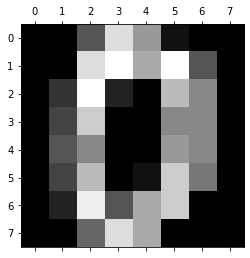

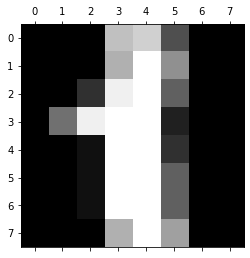

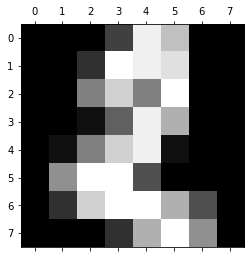

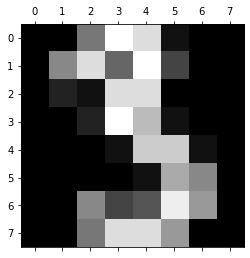

In [29]:
# here images is the physical black and white images

plt.gray()
for i in range(4):
    plt.matshow(digit.images[i])

In [41]:
# here target is the name/tag of the black and white images in train data
# there are 1797 total test images and their respective tags here

digit.target[:4] , digit.target.shape

(array([0, 1, 2, 3]), (1797,))

In [42]:
# here target_names is the total number of unique tags/targets here like (0----9)

digit.target_names[:] , digit.target_names.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), (10,))

In [60]:
x_train, x_test, y_train, y_test = train_test_split(digit.data , digit.target , test_size = 0.2)

In [61]:
model = LogisticRegression(solver='lbfgs', max_iter = 5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [62]:
model.score(x_test,y_test)

0.9777777777777777

# Confusion matrix 
- way of vizualizing accuracy of model and its faults

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
y_expected = y_test
y_predicted = model.predict(x_test)

In [65]:
cm = confusion_matrix(y_expected , y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 35,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

### For better visualization

Text(69.0, 0.5, 'Expected')

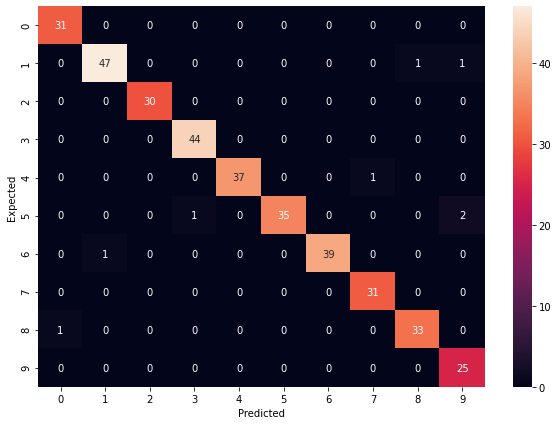

In [69]:
import seaborn as sb

plt.figure(figsize = (10,7))
sb.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Expected')